# <font color=#cd0000> Propósito principal </font>
- La idea de este librillo es preparar el entorno para realizar pruebas para HeartBeat a ser clasificado por una codificación simbólica con SMTS

## <font color=#cd0000> Leyenda </font>
- Los apartados titulados con el código de colores HEX: `#cd0000` serán apartados que tendrán todos los librillos, en concreto, aquellos especificados en el apartado `Síntesis de los criterios usados` del trabajo.
- Los apartados titulados con el código de colores HEX: `#2451ff` serán apartados de conclusiones propias de este librillo resultado de aplicar un estudio personalizado para cada planteamiento.

# <font color=#cd0000> Prerrequisitos </font>
## <font color=#cd0000> Entorno de ejecución </font>
- Cambiamos el directorio raíz del librillo para acceder cómodamente a las funciones de utilidad.

In [1]:
import os

os.chdir('../../../../')
os.listdir()


['.git',
 '.gitignore',
 '.gitmodules',
 'data',
 'HeartBeat_tmp_test_data.pkl',
 'HeartBeat_tmp_train_data.pkl',
 'pkl',
 'Pruebas',
 'README.md',
 'smts_implementation',
 'utils']

## <font color=#cd0000> Constantes y variables predefinidas </font>

In [2]:
HEARTBEAT_PATH = "data/heartbeat"

DATA_TO_SAVE = "HeartBeat"

PKL_DIR = "pkl/SMTS/HeartBeat/"
PKL_NAME = "heartbeat_smts_codifsimb.pkl"

SEED = 1


# <font color=#cd0000> Carga del Dataset </font>

In [3]:
from utils.load_data import import_heartbeat_dataset

train, test = import_heartbeat_dataset(HEARTBEAT_PATH)

In [4]:
import pickle

pickle.dump(train, open(DATA_TO_SAVE + "_tmp_train_data.pkl", 'wb'))
pickle.dump(test, open(DATA_TO_SAVE + "_tmp_test_data.pkl", 'wb'))


In [5]:
import pickle

train = pickle.load(open(DATA_TO_SAVE + "_tmp_train_data.pkl", 'rb'))
test = pickle.load(open(DATA_TO_SAVE + "_tmp_test_data.pkl", 'rb'))


In [6]:
train.reset_changes()
test.reset_changes()


# <font color=#cd0000> Preprocesamiento </font>

## <font color=#cd0000> Eliminación de datos inválidos y valores atípicos </font>
- Como ya anticipamos en el análisis en profundidad de este conjunto de datos eliminaremos todos los atributos dado su alto grado de correlación salvo los atributos: `signal_1`, `signal_10`, `signal_20`, `signal_30`, `signal_40`, `signal_50` y `signal_60`
- Eliminaremos aquellos valores fuera de los percentiles 5 y 95.

### <font color=#2451ff> Eliminación de atributos altamente correlacionados </font>

In [7]:
columns_to_remove = train.get_derived_data_columns()['attrs']
column_to_study = ['signal_1', 'signal_10', 'signal_20',
                   'signal_30', 'signal_40', 'signal_50', 'signal_60']

for col in columns_to_remove:
    if col in column_to_study:
        columns_to_remove.remove(col)

train.drop_derived_data_columns(columns_to_remove)
test.drop_derived_data_columns(columns_to_remove)


,id,TimeStamp,signal_1,signal_10,signal_20,signal_30,signal_40,signal_50,signal_60,class
0,0,0,0.004578,0.009483,0.003414,0.009437,0.008221,0.030211,1.000400,normal
1,0,1,0.011682,0.013566,0.004089,0.012686,0.012927,0.070100,0.673670,normal
2,0,2,0.017709,0.019086,0.011413,0.030151,0.039722,0.100600,0.904520,normal
3,0,3,0.016318,0.017490,0.016408,0.044615,0.059496,0.091279,1.322500,normal
4,0,4,0.011723,0.008481,0.008594,0.025718,0.030744,0.024211,1.622600,normal
...,...,...,...,...,...,...,...,...,...,...
83020,204,400,0.007057,0.001993,0.005595,0.003932,0.002723,0.002055,0.353420,abnormal
83021,204,401,0.012607,0.002142,0.004760,0.000763,0.002429,0.001636,0.349890,abnormal
83022,204,402,0.011410,0.004370,0.000505,0.000902,0.002300,0.001022,0.264820,abnormal
83023,204,403,0.008735,0.003033,0.001830,0.001835,0.004181,0.002472,0.130270,abnormal


### <font color=#2451ff> Eliminación de outliers </font>
- El grado de outliers mínimo en, al menos, una dimensión para eliminar una serie temporal será del 80% (si más del 80% de los datos son anómalos descartamos la serie).
  - A pesar de que esto pueda parecer muy grande debemos comprender que, la probabilidad con la que aparezca ruido en una de las dimensiones de una serie temporal multivariada, es muy alta (tenemos varias series temporales con ruido cada una).

In [8]:
train.remove_outliers(
    headers=train.get_derived_data_columns()['attrs'],
    outliers_limit=.8
)

test.remove_outliers(
    headers=test.get_derived_data_columns()['attrs'],
    outliers_limit=.8
)


In [9]:
import pandas as pd

# Remaining series
print("Train: Previous number of series: {}".format(
    len(pd.unique(train.original_data['id']))))
print("Train: Actual number of series: {}".format(
    len(pd.unique(train.derived_data['id']))))

print("Test: Previous number of series: {}".format(
    len(pd.unique(test.original_data['id']))))
print("Test: Actual number of series: {}".format(
    len(pd.unique(test.derived_data['id']))))


Train: Previous number of series: 204
Train: Actual number of series: 198
Test: Previous number of series: 205
Test: Actual number of series: 199


## <font color=#cd0000> Resoluciones a aplicar </font>
- Como concluimos en el análisis en profundidad, mantendremos la resolución original.

In [10]:
# Nothing to see here


# <font color=#cd0000> División en ventanas </font>
- Como concluimos en el análisis en profundidad no aplicaremos enventanado pues ya está preaplicado.

In [ ]:
# Nothing to see here


## <font color=#cd0000> Codificación </font>
- Series originales (aplicaremos la codificación simbólica cuando entrenemos el SMTS -> está implícita en su entrenamiento)

In [ ]:
# Nothing to see here

# <font color=#cd0000> Preparación de los datos </font>

In [15]:
X_train = train.derived_data.drop(['TimeStamp', 'class'], axis=1)
X_test = test.derived_data.drop(['TimeStamp', 'class'], axis=1)

y_train = train.derived_data['class'].to_numpy()
y_test = test.derived_data['class'].to_numpy()


## <font color=#cd0000> Técnicas de balanceo </font>

### <font color=#cd0000> Asignación de pesos a las clases </font>

In [16]:
import numpy as np
from sklearn.utils import compute_class_weight

class_weights = compute_class_weight(
    'balanced', classes=np.unique(y_train), y=y_train)
class_weights = {'abnormal': class_weights[0], 'normal': class_weights[1]}


# <font color=#cd0000> Diseño de la topología del bosque </font>
- Número de árboles inicial recomendado
- Número de símbolos inicial recomendado

## <font color=#cd0000> Entrenamiento </font>

In [43]:
from smts_implementation.smts import SMTS

clf = SMTS(
    j_ins=10,
    n_symbols=10,
    class_weight=class_weights,
    random_state=SEED
)
clf.fit(X_train, y_train)


## <font color=#cd0000> Clasificación </font>

In [44]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = clf.predict(X_test)
y_true = X_test.assign(class_name=y_test).groupby('id')\
    .first()['class_name'].to_numpy()

print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred, zero_division=0))


[[123  20]
 [ 28  28]]
              precision    recall  f1-score   support

    abnormal       0.81      0.86      0.84       143
      normal       0.58      0.50      0.54        56

    accuracy                           0.76       199
   macro avg       0.70      0.68      0.69       199
weighted avg       0.75      0.76      0.75       199



## <font color=#cd0000> Discusión de los resultados </font>
- Vamos a estudiar diferentes rangos de hiper-parámetros interesantes que podrían darnos alguna pista sobre el rango en el que buscar el mejor clasificador de este tipo:
  - Para un `j_ins` pequeño (10) y un `n_symbols` pequeño (10) observamos un desempeño bastante superior al del RandomForest sin aplicar la Codificación Simbólica, no obstante, seguimos teniendo un alto error en la predicción de la clase `normal`:
    ```
    Confusion matrix:
    [[123  20]
     [ 28  28]]

    Classification report:
                      precision    recall  f1-score   support

        abnormal       0.81      0.86      0.84       143
          normal       0.58      0.50      0.54        56

        accuracy                           0.76       199
       macro avg       0.70      0.68      0.69       199
    weighted avg       0.75      0.76      0.75       199
    ```
  - Para un `j_ins` pequeño (10) y un `n_symbols` grande (200) observamos un desempeño peor, vamos a probar a incrementar el número de estimadores:
    ```
    Confusion matrix:
    [[122  21]
     [ 31  25]]

    Classification report:
                      precision    recall  f1-score   support

        abnormal       0.80      0.85      0.82       143
          normal       0.54      0.45      0.49        56

        accuracy                           0.74       199
       macro avg       0.67      0.65      0.66       199
    weighted avg       0.73      0.74      0.73       199
    ```

  - Para un `j_ins` grande (200) y un `n_symbols` grande (200) observamos que los resultados siguen siendo inferiores, esta vez, probaremos a disminuir el número de símbolos y mantener j_ins:
    ```
    Confusion matrix:
    [[125  18]
     [ 33  23]]

    Classification report:
                      precision    recall  f1-score   support

        abnormal       0.79      0.87      0.83       143
          normal       0.56      0.41      0.47        56

        accuracy                           0.74       199
       macro avg       0.68      0.64      0.65       199
    weighted avg       0.73      0.74      0.73       199
    ```
  - Para un `j_ins` grande (200) y un `n_symbols` intermedio (100) observamos que los resultados siguen empeorando aún más así que probaremos a disminuir el número de j_ins más adelante:
    ```
    Confusion matrix:
    [[127  16]
     [ 35  21]]

    Classification report:
                      precision    recall  f1-score   support

        abnormal       0.78      0.89      0.83       143
          normal       0.57      0.38      0.45        56

        accuracy                           0.74       199
       macro avg       0.68      0.63      0.64       199
    weighted avg       0.72      0.74      0.73       199
    ```
  - Para un `j_ins` intermedio (100) y un `n_symbols` intermedio (100) observamos que los resultados mejoran pero seguimos sin obtener el rendimiento que teníamos para j_ins=10 y n_symbols=10. Probaremos a seguir decrementando el nº de símbolos y a mantener j_ins:
    ```
    Confusion matrix:
    [[125  18]
     [ 30  26]]

    Classification report:
                      precision    recall  f1-score   support

        abnormal       0.81      0.87      0.84       143
          normal       0.59      0.46      0.52        56

        accuracy                           0.76       199
       macro avg       0.70      0.67      0.68       199
    weighted avg       0.75      0.76      0.75       199
    ```
  - Para un `j_ins` intermedio (100) y un `n_symbols` pequeño (10) observamos que los resultados son algo inferiores a los primeros obtenidos:
    ```
    Confusion matrix:
    [[119  24]
     [ 28  28]]

    Classification report:
                      precision    recall  f1-score   support

        abnormal       0.81      0.83      0.82       143
          normal       0.54      0.50      0.52        56

        accuracy                           0.74       199
       macro avg       0.67      0.67      0.67       199
    weighted avg       0.73      0.74      0.74       199
    ```

## <font color=#cd0000> Conclusiones </font>
- Como podemos observar, este clasificador, sí tiene en cuenta el orden de las secuencias de nuestras series temporales con la codificación aplicada lo que le permite clasificar mejor el conjunto de validación y generalizar con mayor facilidad la clase minoritaria.
- A partir de este estudio preliminar pensamos que es interesante profundizar en la búsqueda de hiper-parámetros:
  - `j_ins`: [10, 100]
  - `n_symbols`: [10, 100]

# <font color=#cd0000> Randomized Search </font>
- Búsqueda de hiper-parámetros aleatoria con SMTS maximizando ``macro avg f1-score``

## <font color=#cd0000> Rangos de búsqueda </font>
- Como vimos anteriormente los rangos de búsqueda aleatoria de los mejores hiper-parámetros serán los siguientes

In [45]:
J_INS_RANGE = range(10, 100)
N_SYMBOLS_RANGE = range(10, 100)

In [46]:
import random
import pickle
import utils.constants as cs
from smts_implementation.smts import SMTS
from utils.classifier_utils import (windowed_cross_val,
                                    compute_classification_reports_means)
from utils.plot_utils import pretty_print_classification_report_dict


def smts_randomized_search_cv(
        windowed_series,
        relation_with_series,
        prefix,
        class_weights,
        cv=5):
    global PKL_DIR
    all_clf_used = {}

    n_samples = 5
    j_ins_list = random.sample(list(J_INS_RANGE), n_samples)
    n_symbols_list = random.sample(list(N_SYMBOLS_RANGE), n_samples)

    best_hyp_params = None
    best_score = 0
    for j_ins in j_ins_list:
        for n_symbols in n_symbols_list:
            clf = SMTS(
                j_ins=j_ins,
                n_symbols=n_symbols,
                class_weight=class_weights,
                random_state=SEED
            )

            reports = windowed_cross_val(
                clf,
                windowed_series,
                relation_with_series,
                estimator_type=cs.ESTIMATOR_SMTS,
                cv=cv,
                drop_columns=['class'],
                seed=SEED
            )
            mean_report = compute_classification_reports_means(reports)
            all_clf_used[(j_ins, n_symbols)] = mean_report

            if mean_report['macro avg']['f1-score'][0] >= best_score:
                best_score = mean_report['macro avg']['f1-score'][0]
                best_hyp_params = (j_ins, n_symbols)
                best_report = mean_report

            print("\t\t--------------ACTUAL BEST: J_ins={}; N_symbols={}--------------"
                  .format(best_hyp_params[0], best_hyp_params[1]))
            pretty_print_classification_report_dict(best_report)
            print("\t\t--------------ITERATION: J_ins={}; N_symbols={}--------------"
                  .format(j_ins, n_symbols))
            pretty_print_classification_report_dict(mean_report)

    with open(PKL_DIR + prefix, 'wb') as file:
        pickle.dump(all_clf_used, file)

    return best_hyp_params, best_report


In [47]:
smts_randomized_search_cv(
    train.derived_data,
    train.derived_data_windows_per_serie,
    PKL_NAME,
    class_weights,
    cv=5
)


		--------------ACTUAL BEST: J_ins=25; N_symbols=77--------------
Accuracy: 0.7566446134096967 +/- 0.05462531976953872
abnormal:
	precision: 0.7933602150537634 +/- 0.07706420556520689
	recall: 0.8938224666468608 +/- 0.04156083182631886
	f1-score: 0.8377261831116609 +/- 0.04386125941000706
	support: 28.2 +/- 2.7856776554368237
normal:
	precision: 0.6322222222222222 +/- 0.11375466345073562
	recall: 0.43911421911421905 +/- 0.10797291366876284
	f1-score: 0.501542005055264 +/- 0.07238567683319361
	support: 11.4 +/- 2.4166091947189146
macro avg:
	precision: 0.7127912186379928 +/- 0.05441255398590357
	recall: 0.66646834288054 +/- 0.049446515122064806
	f1-score: 0.6696340940834624 +/- 0.054032129227730874
	support: 39.6 +/- 1.0198039027185568
weighted avg:
	precision: 0.7553919819914918 +/- 0.05651578246400674
	recall: 0.7566446134096967 +/- 0.05462531976953872
	f1-score: 0.7408586718445124 +/- 0.0653398083160838
	support: 39.6 +/- 1.0198039027185568
		--------------ITERATION: J_ins=25; N_symb

((85, 77),
 {'accuracy': (0.7970552318883513, 0.05222504326047005),
  'abnormal': {'precision': (0.8201557455826907, 0.06538017509469976),
   'recall': (0.9138372979408913, 0.037466510970916356),
   'f1-score': (0.8630499476363788, 0.04338336014973626),
   'support': (28.2, 2.7856776554368237)},
  'normal': {'precision': (0.7098412698412698, 0.11871233207993129),
   'recall': (0.5165501165501165, 0.09304513417187019),
   'f1-score': (0.5904795321637427, 0.07980961580627036),
   'support': (11.4, 2.4166091947189146)},
  'macro avg': {'precision': (0.7649985077119801, 0.06172249833925006),
   'recall': (0.7151937072455039, 0.05273117698832254),
   'f1-score': (0.7267647399000606, 0.05491717558816543),
   'support': (39.6, 1.0198039027185568)},
  'weighted avg': {'precision': (0.7958187701125784, 0.05245096881958896),
   'recall': (0.7970552318883513, 0.05222504326047005),
   'f1-score': (0.786531255343168, 0.05611769195144728),
   'support': (39.6, 1.0198039027185568)}})

# <font color=#cd0000> Randomized Search con múltiples ejecuciones en lugar de Validación Cruzada </font>
- No llevaremos a cabo esta aproximación ya que tenemos datos suficientes como para ejecutar validación cruzada.

In [ ]:
# Nothing to see here

# <font color=#cd0000> Análisis de resultados </font>
- Según la búsqueda aleatoria de hiper-parámetros, la mejor combinación, es la de ``j_ins`` = 85 y ``n_symbols`` = 77:
    ```
    Accuracy: 0.7970552318883513 +/- 0.05222504326047005
    abnormal:
        precision: 0.8201557455826907 +/- 0.06538017509469976
        recall: 0.9138372979408913 +/- 0.037466510970916356
        f1-score: 0.8630499476363788 +/- 0.04338336014973626
        support: 28.2 +/- 2.7856776554368237
    normal:
        precision: 0.7098412698412698 +/- 0.11871233207993129
        recall: 0.5165501165501165 +/- 0.09304513417187019
        f1-score: 0.5904795321637427 +/- 0.07980961580627036
        support: 11.4 +/- 2.4166091947189146
    macro avg:
        precision: 0.7649985077119801 +/- 0.06172249833925006
        recall: 0.7151937072455039 +/- 0.05273117698832254
        f1-score: 0.7267647399000606 +/- 0.05491717558816543
        support: 39.6 +/- 1.0198039027185568
    weighted avg:
        precision: 0.7958187701125784 +/- 0.05245096881958896
        recall: 0.7970552318883513 +/- 0.05222504326047005
        f1-score: 0.786531255343168 +/- 0.05611769195144728
        support: 39.6 +/- 1.0198039027185568
    ```
- Ahora vamos a visualizar la evolución de los resultados (25 resultados) para observar cómo avanza nuestra métrica objetivo -> Macro Average F1-Score.

In [3]:
import pickle

all_reports = pickle.load(open(PKL_DIR + PKL_NAME, 'rb'))


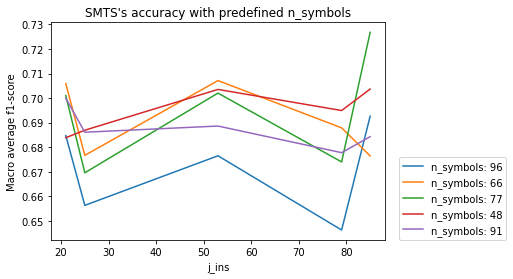

In [49]:
from utils.plot_utils import plot_score

macro_avg_f1_scores = dict(map(
    lambda z: (z, {'score': all_reports[z]['macro avg']['f1-score'][0],
                   'std': all_reports[z]['macro avg']['f1-score'][1]}),
    all_reports
))

plot_score(
    [macro_avg_f1_scores],
    ('j_ins', 'n_symbols'),
    'SMTS',
    inverse=False,
    mode='score',
    in_same_graphic=True,
    accuracy_mode='accuracy',
    metric_name='Macro Average F1-Score'
)


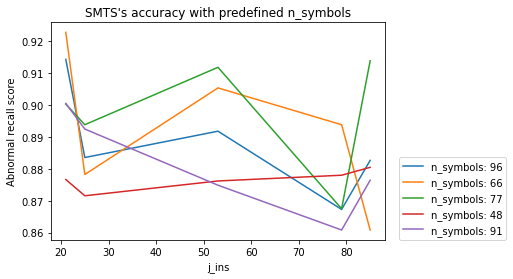

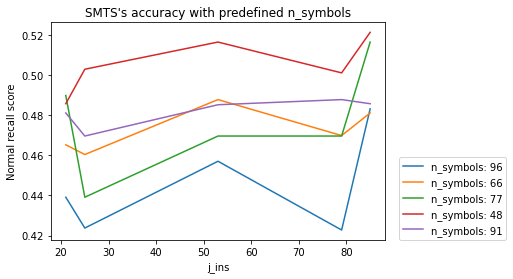

In [50]:
abnormal_recall_scores = dict(map(
    lambda z: (z, {'score': all_reports[z]['abnormal']['recall'][0],
                   'std': all_reports[z]['abnormal']['recall'][1]}),
    all_reports
))

normal_recall_scores = dict(map(
    lambda z: (z, {'score': all_reports[z]['normal']['recall'][0],
                   'std': all_reports[z]['normal']['recall'][1]}),
    all_reports
))

plot_score(
    [abnormal_recall_scores],
    ('j_ins', 'n_symbols'),
    'SMTS',
    inverse=False,
    mode='score',
    in_same_graphic=True,
    accuracy_mode='accuracy',
    metric_name='Abnormal recall score'
)

plot_score(
    [normal_recall_scores],
    ('j_ins', 'n_symbols'),
    'SMTS',
    inverse=False,
    mode='score',
    in_same_graphic=True,
    accuracy_mode='accuracy',
    metric_name='Normal recall score'
)


# <font color=#cd0000> Evaluación sobre el conjunto de validación </font>
- Vamos a llevar a cabo la evaluación final sobre el conjunto de validación (esto es lo que irá al apartado de ``Pruebas y Resultados`` de la memoria).

## <font color=#cd0000> Entrenamiento </font>

In [51]:
from smts_implementation.smts import SMTS

clf = SMTS(
    j_ins=85,
    n_symbols=77,
    class_weight=class_weights,
    random_state=SEED
)
clf.fit(X_train, y_train)


## <font color=#cd0000> Clasificación </font>

In [52]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = clf.predict(X_test)
y_true = X_test.assign(class_name=y_test).groupby('id')\
    .first()['class_name'].to_numpy()

print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred, zero_division=0))


[[127  16]
 [ 29  27]]
              precision    recall  f1-score   support

    abnormal       0.81      0.89      0.85       143
      normal       0.63      0.48      0.55        56

    accuracy                           0.77       199
   macro avg       0.72      0.69      0.70       199
weighted avg       0.76      0.77      0.76       199



# <font color=#cd0000> Conclusiones </font>
- Como podemos observar y, en comparación con el clasificador RandomForest que no tiene en cuenta el orden de las secuencias de nuestros datos, los resultados obtenidos son mucho mejores con diferencia a la hora de clasificar el conjunto de validación como habíamos previsto.
- Sin embargo, sigue siendo apreciable que, nuestro clasificador, sigue clasificando bastante peor la clase minoritaria por lo que, un esfuerzo de caracterización de esta clase o la obtención de una mayor cantidad de datos (vía data augmentation o recopilando datos reales) sería necesaria.